## ** Second Project ( Analysing 'No show appointment' problem / by Abdullah Alweheid) **

## Describing problem :
- A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? If this is help, don´t forget to upvote :) Greatings! (reference: kaggle)

- depending on that i will try to search about appropriate questions which can guide me to handle the issue and try to solve it.

- To get the metadata of the dataset, click here please: https://www.kaggle.com/joniarroba/noshowappointments/data

## Questions : 
`**NOTE**: These question below are to help me on thinking of the data, may I'll not answer all of them but i will try to solve the general problem using them `
- The big question is why patient does not come to the appointment? 
- is the date of appointment a factor ? 
- If patient get reminding message what is the probability to attend?
- Does female attend usually more than male ? because of some work , may be?! 
- Does some disease can affect on attending? 

## Data Wrangling Phase:

### 1) Import libraries : 

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2) Load Data and display it: 

In [248]:
df = pd.read_csv('noshowpatient.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 3) Assessing and Cleaning:

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



- Great! there are missing values
- there is issue in data type of date, we need to change it using to_datatime() in next steps.
- It's clerly confusing when you see the patientID in float! and when I take a look! it's not in good formating!

In [250]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [251]:
df.describe(include='O')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


### 4) Trying to reshape the data:
 - what column should i keep and what column should i drop ? 

In [252]:
## Check the duplications : 
df.duplicated().sum()

0

In [253]:
(df['PatientId'].count() - df['PatientId'].nunique()) / 110527 *100  ## to get the percentage of unique patient

44.13672677264378

#### Droping columns :
- while these percantage of unique patient is high i think this column will not give me good point to analys also the appintmentID. All of them will not play a good role in my predection process, because i need the reasons in general not in specific patient, So I will drop all of these columns 
- Also the scolarship 

In [254]:
df.drop(['PatientId' , 'AppointmentID'] , axis=1 ,inplace=True) ## drop 'PatientId' , 'AppointmentID' columns

In [255]:
## Now i will change the type of ScheduledDay and AppointmentDay to be in data type :
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [256]:
## Here i will ignore the time of the appointmet i will just take the date
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay.dt.date)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay.dt.date)

In [257]:
# Now i will add a column after No-Show which describe is the appointment day was in the weekday or not! 
df['Weekday'] = df.AppointmentDay.dt.weekday_name

In [258]:
df_temp = df['Weekday']
## Now i will Write a function to either set 0 or 1 if week day or not respectively :
def isWeekday(x):
    weekend = ['Friday' , 'Thursday']
    if x in weekend:
        x = 0
    else:
        x = 1
    return x


df['Weekday'] = df_temp.apply(isWeekday)

In [259]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


`now I've finish the wrnagling process as i think.`

## Exploration Phase

### 1) independent variable investigation :

In [260]:
## i will check that which is more male or female ? 
df.describe(include='O')

,Gender,Neighbourhood,No-show
count,110527,110527,110527
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,71840,7717,88208


In [267]:
71840 / 110527 *100 ## this for Gender 

64.99769287142509

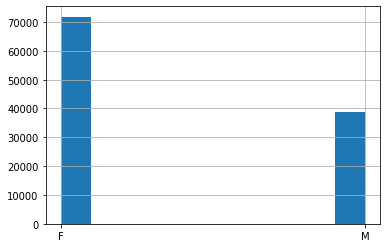

In [271]:
df['Gender'].hist()

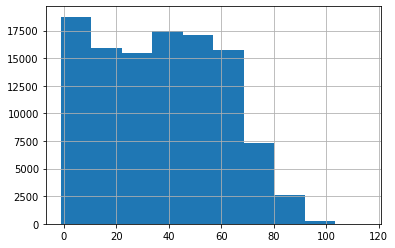

In [274]:
df['Age'].hist()

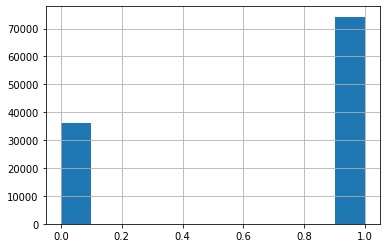

In [275]:
df['Weekday'].hist()

- we can see that more than half of the appointments are for female.
- we can check that in future, who are have missing the attend more? 
- The distribution of  Age is seems to be reasonable
- Most of appintment day was in weekday 

In [262]:
## Now I will use a correlation between each other :
## but before do that i need to change the value of No-show column to be either 1 for yes and 0 for no
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [264]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [265]:
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Weekday
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319,-0.001635
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135,0.001534
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701,-0.003229
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180,-0.004458
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196,-0.002640
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076,-0.005506
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431,0.106705
No-show,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000,-0.002482
Weekday,-0.001635,0.001534,-0.003229,-0.004458,-0.002640,-0.005506,0.106705,-0.002482,1.000000


- we can see the defficulites !! no good relation between all of the variable with the attend ! 
- I may assume that there are more one reason to be No-show appointment

### 2) dependent variables investigation :

In [295]:
## I will choose many variables that i think they are related to patient No-Show
## I choose Gender and No-show 
df_temp1 = df.groupby('Gender').sum()['No-show']
df_temp1.head()

Gender
F    14594
M     7725
Name: No-show, dtype: int64

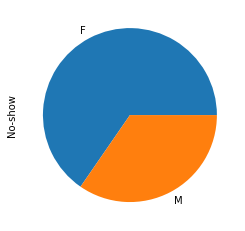

In [306]:
df_temp1.plot.pie()

- Most of the missing appointments was from female
- For one man miss the appointment there are two women also miss it

In [301]:
df_temp2 = df.groupby('Neighbourhood').sum()['No-show']
df_temp2.head()

Neighbourhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
Name: No-show, dtype: int64

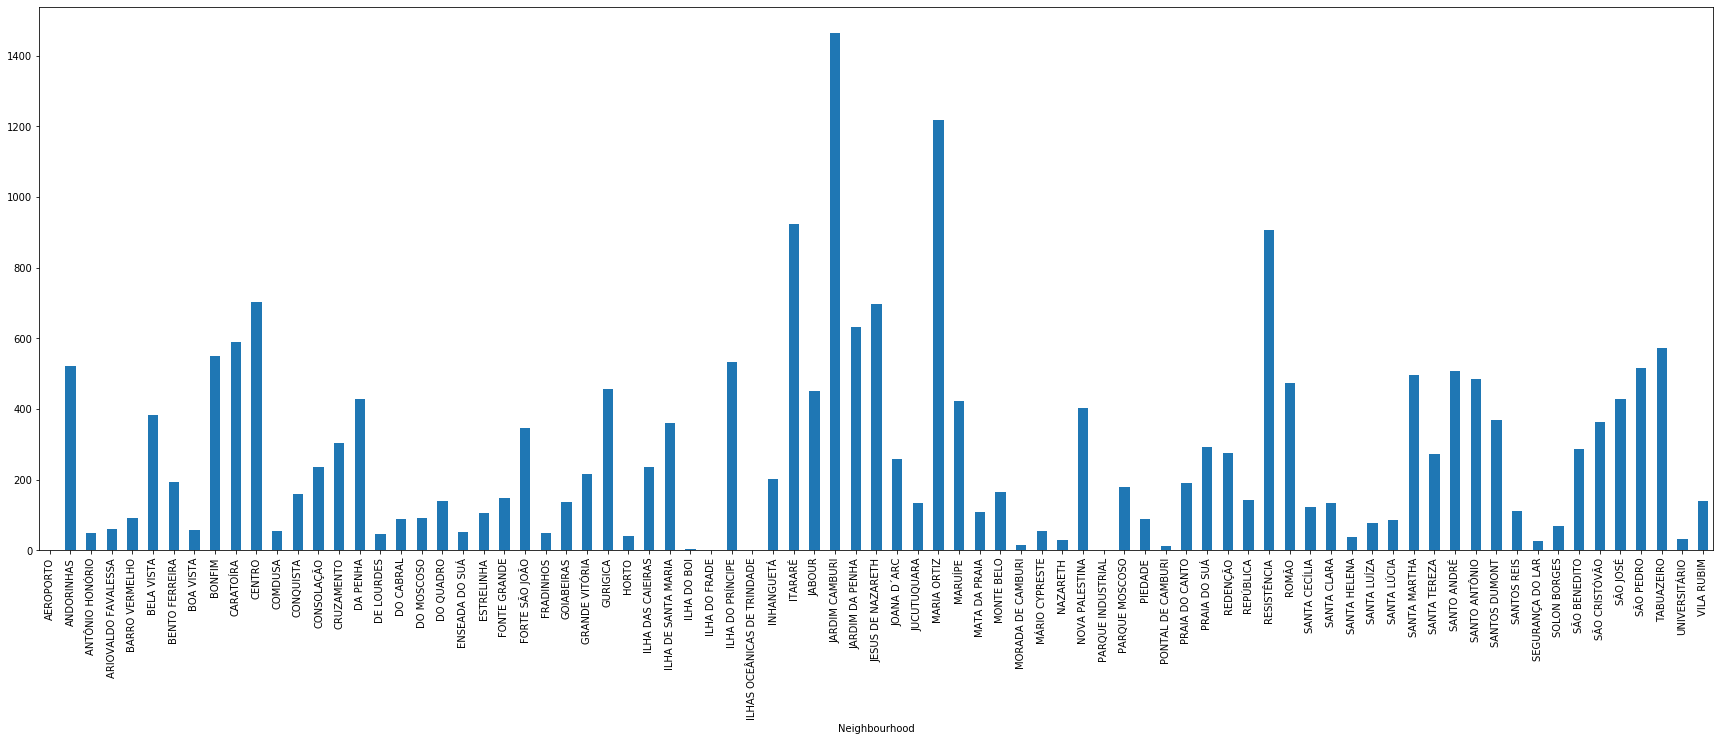

In [318]:
df_temp2.plot.bar(figsize = (30,10))

## Double click on the figure to make it large :) 

- There are some neighbourhoods which has hisgh numbers of missed appointment 
- May they are not closer to the hospitalies 

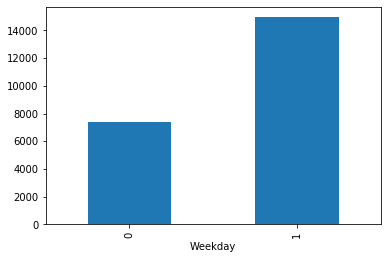

In [331]:
df_temp3 = df.groupby('Weekday').sum()['No-show']
df_temp3.plot.bar()

- Great! most of No-show happend in weekday, maybe they are busy in thier jobs! 

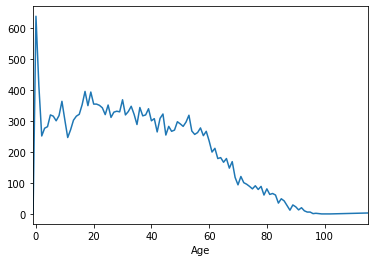

In [346]:
df_temp4 = df.groupby('Age').sum()['No-show']
df_temp4.plot.line(x='Age',y='No-show')

- We can see that most of No-show appointment was from younger  

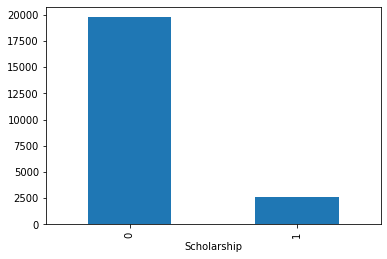

In [426]:
df_temp5 = df.groupby('Scholarship').sum()['No-show']
df_temp5.plot.bar()

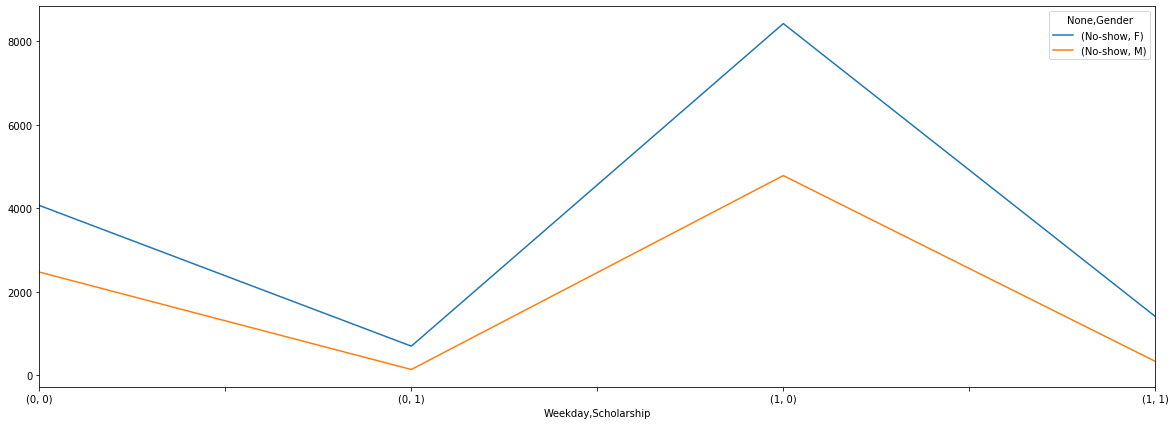

In [430]:
df_temp6 = df.groupby(['Weekday' ,'Scholarship','Gender']).sum()[['No-show']]
# plot data
fig, ax = plt.subplots(figsize=(20,7))
# use unstack()
df_temp6.unstack().plot(ax=ax)


#### I get this way of plotting from this site : https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
`** double click on it to make chart large **`
- Wow! Scholarship is very influence variable!! even if the day of appointment is not in weekend! 

In [427]:
df_temp7 = df.groupby(['Weekday' ,'Neighbourhood','Gender']).sum()[['No-show']]
df_temp7.head(20)

No-show
Weekday Neighbourhood       Gender         
0       AEROPORTO           F             1
                            M             0
        ANDORINHAS          F           113
                            M            51
        ANTÔNIO HONÓRIO     F             7
                            M             8
        ARIOVALDO FAVALESSA F            17
                            M             6
        BARRO VERMELHO      F            23
                            M             7
        BELA VISTA          F            75
                            M            58
        BENTO FERREIRA      F            54
                            M            21
        BOA VISTA           F            11
                            M            14
        BONFIM              F           110
                            M            52
        CARATOÍRA           F           131
                            M            88

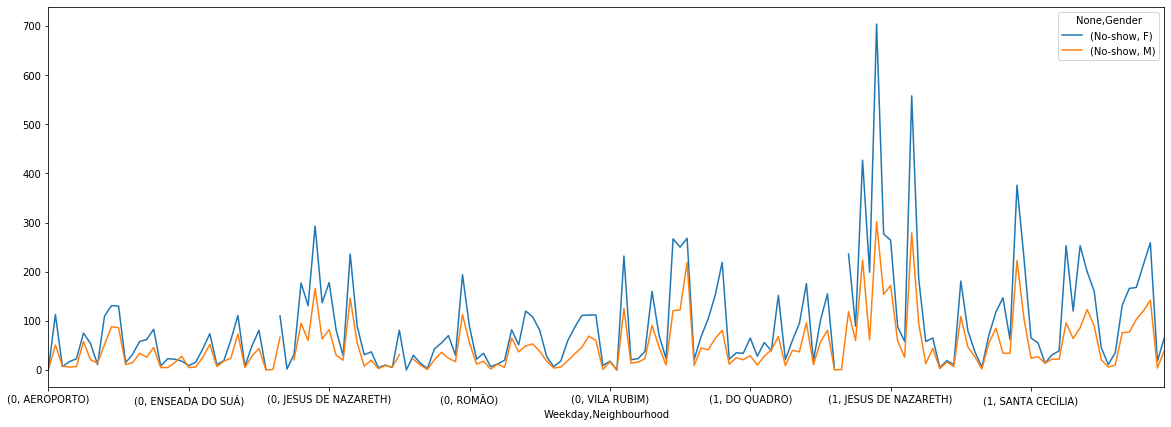

In [428]:
# plot data
fig, ax = plt.subplots(figsize=(20,7))
# use unstack()
df_temp7.unstack().plot(ax=ax)


#### I get this way of plotting from this site : https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
`** double click on it to make chart large **`
- We can see the values in x-axis of (weekday, Neighbourhood)
- Clearly we can conclude that which 'Neighbourhood' has most of missing appointment and which gender for week day or not, this will help us in prediction.  

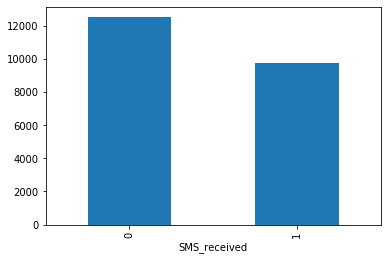

In [436]:
df_temp8 = df.groupby('SMS_received').sum()['No-show']
df_temp8.plot.bar()

- clearly, reciving message does not make more change!! 
- Strongly it is abnormal ,I don't know why these miss the appointment when they receive reminder message!

## Conclusions Phase


* Finnaly, I think that i reach a stisfy point in my analysing. I was able to know which variable are playing a role? 
* There are some limitations in this Dataset: Who is work who is not ? who has transport way such as car ? How many hospitals in the area ? which hospitls are in the data ? 
* `I can see that more of missed appointment came from female , and the probabilty it will not come will arise if there is no scholarship and if the appointment day was in weekday.`
* So wee need more government programs that can help like scholarship and see who are retiremened people and put them appointmets in the weekday, i mean we need such solutions like that. 